# Ollama RAG exercises

Just some code to learn more about RAG. Don't expect too much of it, it's just fun! 

### Contents
1. Learn the theory of cosines similarity
2. Create embeddings with ollama.
3. Calculate cosine similarity between two sentences
4. Convert a pdf to text

## 1. Learn theory of cosine similarity

In [53]:
#Define two points

# Choose values [1-10] (integers/floats) to properly plot it below
# point 1
p1x = 4
p1y = 3

#point 2
p2x = 3
p2y = 4

In [54]:
#function to calculate cosine similarity
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    magnitude_a = sum(x * x for x in a) ** 0.5
    magnitude_b = sum(x * x for x in b) ** 0.5
    cos_sim = dot_product / (magnitude_a * magnitude_b)
    return cos_sim

p1x, p1y = 1, 2  # Example values for the first vector
p2x, p2y = 3, 4  # Example values for the second vector

result = cosine_similarity((p1x, p1y), (p2x, p2y))
print(result)

0.9838699100999074


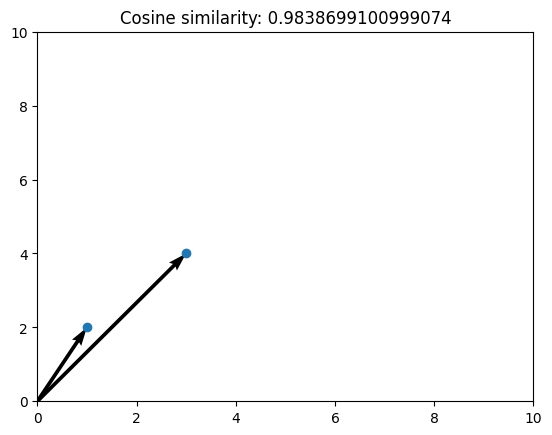

In [59]:
#plot the points and create a vector from 0,0
%matplotlib inline
import matplotlib.pyplot as plt 

#get points and plot them
points_x = p1x, p2x
points_y = p1y, p2y
plt.plot(points_x, points_y, 'o') 

#plot vectors 
plt.quiver([0, 0], [0, 0], [p1x, p2x], [p1y,p2y], angles='xy', scale_units='xy', scale=1)

#plot axes and show it
plt.title(f'Cosine similarity: {result}')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercise 1: 
1. play with the points and see what happens
2. create two examples:
    - Where cosine similarity is 1
    - Where cosine similarity is 0

## 2. Create embeddings with ollama. Compare two models in speed.

In [ ]:
#check if you have to nomic-embed-text
!ollama list

In [ ]:
%%time
import ollama
ollama.embeddings(model='mistral', prompt='The dog ran fast')

In [ ]:
%%time
import ollama
ollama.embeddings(model='nomic-embed-text', prompt='The dog ran fast')

## 3. Calculate cosine similarity between to sentences

In [ ]:
!pip install torch

In [ ]:
import ollama
import torch
embeddings_dict = ollama.embeddings(model='nomic-embed-text', prompt='The dog ran fast')
#embeddings_0 = embeddings_dict['embedding']
embeddings_0 = torch.tensor(embeddings_dict['embedding'])
print(len(embeddings_0))
print(embeddings_0)

In [ ]:
%%time
import ollama
embeddings_dict = ollama.embeddings(model='nomic-embed-text', prompt='The cat ran fast')
embeddings_1 = torch.tensor(embeddings_dict['embedding'])
print(len(embeddings_1))
print(embeddings_1)

In [ ]:
import torch
#calculate the cosine similarity
cos = torch.nn.CosineSimilarity(dim=0)

similarity = cos(embeddings_0,embeddings_1).item()
similarity = (similarity+1)/2

print("Cosines similarity two sentences: ", similarity)

## 4. Convert a .pdf to .txt

In [ ]:
!pip install PyPDF2

In [ ]:
from PyPDF2 import PdfReader

In [ ]:
import wget
document = wget.download('https://assets.scriptslug.com/live/pdf/scripts/pulp-fiction-1994.pdf')
document

In [ ]:
# Select the .pdf file to read 
reader = PdfReader('./pulp-fiction-1994.pdf')
reader

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text
print(raw_text[:200])
print(50 * '-')
print(f'The text is {len(raw_text)} characters')

In [ ]:
#save raw_text to a .txt file
file = open("pulp_fiction.txt", "w") #w for write
file.write(raw_text)
file.close()